Import libraries and collect the latest Bitcoin prices form yahoo finance

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('BTC-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date          Open          High           Low         Close  \
0 2021-04-09  58326.562500  58937.046875  57807.863281  58245.003906   
1 2021-04-10  58253.777344  61276.664062  58038.707031  59793.234375   
2 2021-04-11  59846.230469  60790.554688  59289.796875  60204.964844   
3 2021-04-12  60175.945312  61253.035156  59589.875000  59893.453125   
4 2021-04-13  59890.019531  63742.285156  59869.957031  63503.457031   

      Adj Close       Volume  
0  58245.003906  46655208546  
1  59793.234375  58238470525  
2  60204.964844  46280252580  
3  59893.453125  51828688519  
4  63503.457031  69983454362  


In [2]:
data.shape

(730, 7)

Visualize the change in bitcoin prices till today by using a candlestick chart:

In [3]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Bitcoin Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

Correlation of all the columns in the data concerning the Close column:

In [4]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.997730
Low          0.997693
Open         0.995126
Volume       0.301769
Name: Close, dtype: float64


C:\Users\Usuário\AppData\Local\Temp\ipykernel_9180\2923706208.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Using the AutoTS library to predict the bitcoin prices for the next 30 days:

In [7]:
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
22/22 [==============================] - 5s 4ms/step - loss: 0.4153
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4151
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4156
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4151
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4148
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4126
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4135
Epoch 8/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4133
Epoch 9/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4143
Epoch 10/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4134
Epoch 11/50
22/22 [==============================] - 0s 5ms/step - loss: 0.4096
Epoch 12/50
22/22 [==============================] - 0s 4ms/s

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 36 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 36 in generation 0: FBProphet
Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 37 in generation 0: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39 in generation 0: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40 in generation 0: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model UnobservedComponents in generation 0 of 10
Model Number: 45 with model ETS in generation 0 of 10
Model Number: 46 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 46 in generation 0: VECM
Model Number: 47 with model ARDL in generation 0 of 10
Model Number: 48 with model MultivariateMotif in generation 0 of 10
Model Number: 49 with model MultivariateMotif in generation 0 of 10
Model Number: 50 with model UnivariateMotif in generation 0 of 10
Model Number: 51 with model UnivariateMotif in generation 0 of 10
Model Number: 52 with model SectionalMotif in generation 0 of 10
Model Number: 53 with model SectionalMotif in generation 0 of 10
Model Number: 54 with model MultivariateRegression in generation 0 of 10
Model Number: 55 with model FBProphet in generation 0 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 58 with model NVAR in generation 0 of 10
Model Number: 59 with model Theta in generation 0 of 10
Model Number: 60 with model UnivariateRegression in generation 0 of 10
Model Number: 61 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 61 in generation 0: ARCH
Model Number: 62 with model ConstantNaive in generation 0 of 10
Model Number: 63 with model LastValueNaive in generation 0 of 10
Model Number: 64 with model AverageValueNaive in generation 0 of 10
Model Number: 65 with model GLS in generation 0 of 10
Model Number: 66 with model SeasonalNaive in generation 0 of 10
Model Number: 67 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 67 in generation 0: GLM
Model Number: 68 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Only gave one variable to VAR') in model 96 in generation 0: VAR
Model Number: 97 with model GLS in generation 0 of 10
Model Number: 98 with model ARDL in generation 0 of 10
Model Number: 99 with model UnivariateMotif in generation 0 of 10
Model Number: 100 with model ARDL in generation 0 of 10
Model Number: 101 with model ETS in generation 0 of 10
Model Number: 102 with model UnivariateMotif in generation 0 of 10
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Number: 104 with model SeasonalNaive in generation 0 of 10
Model Number: 105 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 105 in generation 0: UnobservedComponents
Model Number: 106 with model ConstantNaive in generation 0 of 10
Model Number: 107 with model LastValueNaive in generation 0 of 10
Model Number: 108 with model VAR in generation 0 of 10
Template Eval Error

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 112 with model MetricMotif in generation 0 of 10
Model Number: 113 with model AverageValueNaive in generation 0 of 10
Model Number: 114 with model ARDL in generation 0 of 10
Model Number: 115 with model ARDL in generation 0 of 10
Model Number: 116 with model SeasonalNaive in generation 0 of 10
Model Number: 117 with model SeasonalNaive in generation 0 of 10
Model Number: 118 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 118 in generation 0: ARDL
Model Number: 119 with model ConstantNaive in generation 0 of 10
Model Number: 120 with model ARIMA in generation 0 of 10
Model Number: 121 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 121 in generation 0: ARCH
Model Number: 122 with model Theta in generation 0 of 10
Model Number: 123 with model UnivariateMotif in generation 0 of 10
Model Number: 124 with model

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 126 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 126 in generation 0: GLM
Model Number: 127 with model LastValueNaive in generation 0 of 10
Model Number: 128 with model SectionalMotif in generation 0 of 10
Model Number: 129 with model ConstantNaive in generation 0 of 10
Model Number: 130 with model UnivariateMotif in generation 0 of 10
Model Number: 131 with model SeasonalNaive in generation 0 of 10
Model Number: 132 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 132 in generation 0: VAR
Model Number: 133 with model UnivariateMotif in generation 0 of 10
Model Number: 134 with model SeasonalNaive in generation 0 of 10
Model Number: 135 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 135 in generation 0: ARCH
Model Number: 136 with model LastValueNa

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52436e-25): result may not be accurate.



Model Number: 164 with model AverageValueNaive in generation 0 of 10
Model Number: 165 with model Theta in generation 0 of 10
Model Number: 166 with model ETS in generation 0 of 10
Model Number: 167 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 167 in generation 0: GLM
Model Number: 168 with model MultivariateMotif in generation 0 of 10
Model Number: 169 with model ConstantNaive in generation 0 of 10
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 169 in generation 0: ConstantNaive
Model Number: 170 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 170 in generation 0: ARCH
Model Number: 171 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 171 in generation 0: FBProphet
Model Number: 172 

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning:

overflow encountered in exp

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

invalid value encountered in multiply

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1211: RuntimeWarning:

invalid value encountered in multiply



Model Number: 174 with model Theta in generation 0 of 10
Model Number: 175 with model GLM in generation 0 of 10
Model Number: 176 with model UnivariateMotif in generation 0 of 10
Model Number: 177 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 177 in generation 0: ARDL
Model Number: 178 with model MultivariateMotif in generation 0 of 10
Model Number: 179 with model NVAR in generation 0 of 10
Model Number: 180 with model UnivariateMotif in generation 0 of 10
Model Number: 181 with model Theta in generation 0 of 10
Model Number: 182 with model SectionalMotif in generation 0 of 10
Model Number: 183 with model ARIMA in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 183 in generation 0: ARIMA
Model Number: 184 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 184 in generation 0: VECM
Model

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52436e-25): result may not be accurate.



Model Number: 198 with model SectionalMotif in generation 1 of 10
Model Number: 199 with model MultivariateMotif in generation 1 of 10
Model Number: 200 with model SeasonalNaive in generation 1 of 10
Model Number: 201 with model ARDL in generation 1 of 10
Model Number: 202 with model ETS in generation 1 of 10
Model Number: 203 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 203 in generation 1: DatepartRegression
Model Number: 204 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 204 in generation 1: ARDL
Model Number: 205 with model SeasonalNaive in generation 1 of 10
Model Number: 206 with model ARIMA in generation 1 of 10
Model Number: 207 with model SeasonalNaive in generation 1 of 10
Model Number: 208 with model SectionalMotif in generation 1 of 10
Model Number: 209 with model SectionalMotif i

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 211 with model UnivariateMotif in generation 1 of 10
Model Number: 212 with model SeasonalNaive in generation 1 of 10
Model Number: 213 with model Theta in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 213 in generation 1: Theta
Model Number: 214 with model UnivariateMotif in generation 1 of 10
Model Number: 215 with model NVAR in generation 1 of 10
Model Number: 216 with model AverageValueNaive in generation 1 of 10
Model Number: 217 with model ARDL in generation 1 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 218 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 219 with model LastValueNaive in generation 1 of 10


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 220 with model Theta in generation 1 of 10
Model Number: 221 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 221 in generation 1: DatepartRegression
Model Number: 222 with model ETS in generation 1 of 10
Model Number: 223 with model NVAR in generation 1 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 223 in generation 1: NVAR
Model Number: 224 with model SectionalMotif in generation 1 of 10
Model Number: 225 with model ARIMA in generation 1 of 10
Model Number: 226 with model ETS in generation 1 of 10
Model Number: 227 with model GLM in generation 1 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 227 in generation 1: GLM
Model Number: 228 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 229 with model UnivariateMotif in generation 1 of 10
Model Number: 230 with model MetricMotif in generation 1 of 10
Model Number: 231 with model UnivariateMotif in generation 1 of 10
Model Number: 232 with model ARDL in generation 1 of 10
Model Number: 233 with model ConstantNaive in generation 1 of 10
Model Number: 234 with model DatepartRegression in generation 1 of 10
Model Number: 235 with model AverageValueNaive in generation 1 of 10
Model Number: 236 with model SeasonalNaive in generation 1 of 10
Model Number: 237 with model GLM in generation 1 of 10
Model Number: 238 with model LastValueNaive in generation 1 of 10
Model Number: 239 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 239 in generation 1: MultivariateRegression
Model Number: 240 with model UnivariateMotif in generation 1 of 10
Model Number: 241 with model Theta in generation 1 of 10
Model Number: 242 with model ARDL i

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 250 with model ETS in generation 1 of 10
Model Number: 251 with model Theta in generation 1 of 10
Model Number: 252 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 253 with model MultivariateMotif in generation 1 of 10
Model Number: 254 with model SeasonalNaive in generation 1 of 10
Model Number: 255 with model Theta in generation 1 of 10
Model Number: 256 with model UnivariateMotif in generation 1 of 10
Model Number: 257 with model LastValueNaive in generation 1 of 10
Model Number: 258 with model ARIMA in generation 1 of 10
Model Number: 259 with model ARIMA in generation 1 of 10
Model Number: 260 with model GLM in generation 1 of 10
Model Number: 261 with model UnivariateRegression in generation 1 of 10
Model Number: 262 with model ARDL in generation 1 of 10
Model Number: 263 with model MetricMotif in generation 1 of 10
Model Number: 264 with model UnobservedComponents in generation 1 of 10
Model Number: 265 with model ARIMA in generation 1 of 10
Model Number: 266 with model MetricMotif in generation 1 of 10
Model Number: 267 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 268 with model MultivariateMotif in generation 1 of 10
Model Number: 269 with model MetricMotif in generation 1 of 10
Model Number: 270 with model Theta in generation 1 of 10
Model Number: 271 with model GLM in generation 1 of 10
Model Number: 272 with model SectionalMotif in generation 1 of 10
Model Number: 273 with model MultivariateMotif in generation 1 of 10

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp




Model Number: 274 with model GLS in generation 1 of 10
Model Number: 275 with model SectionalMotif in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 275 in generation 1: SectionalMotif
Model Number: 276 with model MetricMotif in generation 1 of 10
Model Number: 277 with model MetricMotif in generation 1 of 10
Model Number: 278 with model ARDL in generation 1 of 10
Model Number: 279 with model UnobservedComponents in generation 1 of 10
Model Number: 280 with model MultivariateMotif in generation 1 of 10
Model Number: 281 with model ARDL in generation 1 of 10
Model Number: 282 with model NVAR in generation 1 of 10
Model Number: 283 with model ConstantNaive in generation 1 of 10
Model Number: 284 with model DatepartRegression in generation 1 of 10
Model Number: 285 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=Tru

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 289 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             month  day  weekday  weekend       epoch\nDate                                                \n2021-04-09      4    9        4        0  16179264.0\n2021-04-10      4   10        5        1  16180128.0\n2021-04-11      4   11        6        1  16180992.0\n2021-04-12      4   12        0        0  16181856.0\n2021-04-13      4   13        1        0  16182720.0\n...           ...  ...      ...      ...         ...\n2023-03-05      3    5        6        1  16779744.0\n2023-03-06      3    6        0        0  16780608.0\n2023-03-07      3    7        1        0  16781472.0\n2023-03-08      3    8        2        0  16782336.0\n2023-03-09      3    9        3        0  16783200.0\n\n[700 rows x 5 columns] and predict             month  day  weekday  weekend       epoch\n20

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 292 with model NVAR in generation 1 of 10
Model Number: 293 with model LastValueNaive in generation 1 of 10
Model Number: 294 with model Theta in generation 1 of 10
Model Number: 295 with model LastValueNaive in generation 1 of 10
Model Number: 296 with model GLM in generation 1 of 10
Model Number: 297 with model MetricMotif in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 297 in generation 1: MetricMotif
Model Number: 298 with model LastValueNaive in generation 1 of 10
Model Number: 299 with model MetricMotif in generation 1 of 10
Model Number: 300 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 301 with model SeasonalNaive in generation 1 of 10
Model Number: 302 with model ARIMA in genera

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 310 with model SectionalMotif in generation 1 of 10
Model Number: 311 with model ARDL in generation 1 of 10
New Generation: 2 of 10
Model Number: 312 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 313 with model ETS in generation 2 of 10
Model Number: 314 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on 0 with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 315 with model UnobservedComponents in generation 2 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 316 with model UnobservedComponents in generation 2 of 10
Model Number: 317 with model SeasonalNaive in generation 2 of 10
Model Number: 318 with model UnivariateMotif in generation 2 of 10
Model Number: 319 with model GLM in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 319 in generation 2: GLM
Model Number: 320 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 321 with model SectionalMotif in generation 2 of 10
Model Number: 322 with model NVAR in generation 2 of 10
Model Number: 323 with model ARDL in generation 2 of 10


[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 324 with model ARIMA in generation 2 of 10
Model Number: 325 with model ARDL in generation 2 of 10
Model Number: 326 with model ARIMA in generation 2 of 10
Model Number: 327 with model SectionalMotif in generation 2 of 10
Model Number: 328 with model LastValueNaive in generation 2 of 10
Model Number: 329 with model ETS in generation 2 of 10
Model Number: 330 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 330 in generation 2: LastValueNaive
Model Number: 331 with model MultivariateMotif in generation 2 of 10
Model Number: 332 with model Theta in generation 2 of 10
Model Number: 333 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 334 with model Theta in generation 2 of 10
Model Number: 335 with model ARIMA in generation 2 of 10
Model Number: 336 with model LastValueNaive in generation 2 of 10
Model Number: 337 with model AverageValueNaive in generation 2 of 10
Model Number: 338 with model LastValueNaive in generation 2 of 10
Model Number: 339 with model ConstantNaive in generation 2 of 10
Model Number: 340 with model GLM in generation 2 of 10
Model Number: 341 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 341 in generation 2: UnobservedComponents
Model Number: 342 with model UnobservedComponents in generation 2 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 343 with model UnivariateMotif in generation 2 of 10
Model Number: 344 with model ARIMA in generation 2 of 10
Model Number: 345 with model ARIMA in generation 2 of 10
Model Number: 346 with model Theta in generation 2 of 10
Model Number: 347 with model SeasonalNaive in generation 2 of 10
Model Number: 348 with model LastValueNaive in generation 2 of 10
Model Number: 349 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 350 with model UnivariateMotif in generation 2 of 10
Model Number: 351 with model Theta in generation 2 of 10
Model Number: 352 with model Theta in generation 2 of 10
Model Number: 353 with model SeasonalNaive in generation 2 of 10
Model Number: 354 with model AverageValueNaive in generation 2 of 10
Model Number: 355 with model UnobservedComponents in generation 2 of 10
Model Number: 356 with model Theta in generation 2 of 10
Model Number: 357 with model ARDL in generation 2 of 10
Model Number: 358 with model UnobservedComponents in generation 2 of 10
Model Number: 359 with model SeasonalNaive in generation 2 of 10
Model Number: 360 with model Theta in generation 2 of 10
Model Number: 361 with model MetricMotif in generation 2 of 10
Model Number: 362 with model SectionalMotif in generation 2 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52436e-25): result may not be accurate.



Model Number: 363 with model SectionalMotif in generation 2 of 10
Model Number: 364 with model SectionalMotif in generation 2 of 10
Model Number: 365 with model ARDL in generation 2 of 10
Model Number: 366 with model SeasonalNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 366 in generation 2: SeasonalNaive
Model Number: 367 with model AverageValueNaive in generation 2 of 10
Model Number: 368 with model DatepartRegression in generation 2 of 10
Model Number: 369 with model ARIMA in generation 2 of 10
Model Number: 370 with model UnobservedComponents in generation 2 of 10
Model Number: 371 with model UnobservedComponents in generation 2 of 10
Model Number: 372 with model Theta in generation 2 of 10
Model Number: 373 with model UnivariateMotif in generation 2 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 373 in generation 2: UnivariateMotif

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 378 with model ConstantNaive in generation 2 of 10
Model Number: 379 with model SeasonalNaive in generation 2 of 10
Model Number: 380 with model UnivariateMotif in generation 2 of 10
Model Number: 381 with model ARIMA in generation 2 of 10
Model Number: 382 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 383 with model DatepartRegression in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 383 in generation 2: DatepartRegression
Model Number: 384 with model LastValueNaive in generation 2 of 10
Model Number: 385 with model SectionalMotif in generation 2 of 10
Model Number: 386 with model GLM in generation 2 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 386 in generation 2: GLM
Model Number: 387 with model AverageValueNaive in generation 2 of 10


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning:

overflow encountered in exp

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

invalid value encountered in multiply

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1211: RuntimeWarning:

invalid value encountered in multiply



Model Number: 388 with model ARIMA in generation 2 of 10
Model Number: 389 with model UnivariateRegression in generation 2 of 10
Model Number: 390 with model MultivariateMotif in generation 2 of 10
Model Number: 391 with model SeasonalNaive in generation 2 of 10
Model Number: 392 with model MetricMotif in generation 2 of 10
Model Number: 393 with model UnivariateRegression in generation 2 of 10
Model Number: 394 with model SeasonalNaive in generation 2 of 10
Model Number: 395 with model ARDL in generation 2 of 10
Model Number: 396 with model GLS in generation 2 of 10
Model Number: 397 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 398 with model ConstantNaive in generation 2 of 10
Model Number: 399 with model AverageValueNaive in generation 2 of 10
Model Number: 400 with model GLS in generation 2 of 10
Model Number: 401 with model SectionalMotif in generation 2 of 10
Model Number: 402 with model ARDL in generation 2 of 10
Model Number: 403 with model UnobservedComponents in generation 2 of 10
Model Number: 404 with model LastValueNaive in generation 2 of 10
Model Number: 405 with model MetricMotif in generation 2 of 10
Model Number: 406 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 407 with model MetricMotif in generation 2 of 10
Model Number: 408 with model MetricMotif in generation 2 of 10
Model Number: 409 with model ARDL in generation 2 of 10
Model Number: 410 with model MultivariateMotif in generation 2 of 10
Model Number: 411 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 412 with model GLS in generation 2 of 10
Model Number: 413 with model ARIMA in generation 2 of 10
Model Number: 414 with model GLM in generation 2 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 415 with model MultivariateRegression in generation 2 of 10
Model Number: 416 with model Theta in generation 2 of 10
Model Number: 417 with model MetricMotif in generation 2 of 10
Model Number: 418 with model UnivariateMotif in generation 2 of 10
Model Number: 419 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 420 with model Theta in generation 2 of 10
Model Number: 421 with model UnivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 421 in generation 2: UnivariateRegression
Model Number: 422 with model WindowRegression in generation 2 of 10
Model Number: 423 with model UnivariateMotif in generation 2 of 10
Model Number: 424 with model Theta in generation 2 of 10
Model Number: 425 with model SectionalMotif in generation 2 of 10
Model Number: 426 with model SeasonalNaive in generation 2 of 10
Model Number: 427 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 428 with model ETS in generation 2 of 10
Model Number: 429 with model SeasonalNaive in generation 2 of 10
Model Number: 430 with model GLM in generation 2 of 10
Model Number: 431 with model ARDL in generation 2 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

divide by zero encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\autots\tools\probabilistic.py:66: RuntimeWarning:

invalid value encountered in divide



Model Number: 432 with model SeasonalNaive in generation 2 of 10
Model Number: 433 with model ARDL in generation 2 of 10
Model Number: 434 with model GLS in generation 2 of 10
Model Number: 435 with model AverageValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 435 in generation 2: AverageValueNaive
Model Number: 436 with model GLS in generation 2 of 10
New Generation: 3 of 10
Model Number: 437 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 438 with model MultivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 438 in generation 3: MultivariateMotif
Model Number: 439 with model UnobservedComponents in generation 3 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52436e-25): result may not be accurate.



Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 439 in generation 3: UnobservedComponents
Model Number: 440 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 440 in generation 3: ARDL
Model Number: 441 with model GLS in generation 3 of 10
Model Number: 442 with model DatepartRegression in generation 3 of 10
Model Number: 443 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 444 with model SeasonalNaive in generation 3 of 10


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 445 with model UnobservedComponents in generation 3 of 10
Model Number: 446 with model ARIMA in generation 3 of 10
Model Number: 447 with model MultivariateMotif in generation 3 of 10
Model Number: 448 with model MetricMotif in generation 3 of 10
Model Number: 449 with model SeasonalNaive in generation 3 of 10
Model Number: 450 with model ARIMA in generation 3 of 10
Model Number: 451 with model SeasonalNaive in generation 3 of 10
Model Number: 452 with model GLM in generation 3 of 10
Model Number: 453 with model ARDL in generation 3 of 10
Model Number: 454 with model SectionalMotif in generation 3 of 10
Model Number: 455 with model GLM in generation 3 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 455 in generation 3: GLM
Model Number: 456 with model ARDL in generation 3 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\varfuncs.py:265: RuntimeWarning:

overflow encountered in square

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

invalid value encountered in multiply



Model Number: 457 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 457 in generation 3: SeasonalNaive
Model Number: 458 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 459 with model Theta in generation 3 of 10
Model Number: 460 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 461 with model WindowRegression in generation 3 of 10
Model Number: 462 with model LastValueNaive in generation 3 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 463 with model GLS in generation 3 of 10
Model Number: 464 with model LastValueNaive in generation 3 of 10
Model Number: 465 with model Theta in generation 3 of 10
Model Number: 466 with model UnivariateMotif in generation 3 of 10
Model Number: 467 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 467 in generation 3: UnivariateRegression
Model Number: 468 with model SectionalMotif in generation 3 of 10
Model Number: 469 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 470 with model ETS in generation 3 of 10
Model Number: 471 with model MultivariateMotif in generation 3 of 10
Model Number: 472 with model LastValueNaive in generation 3 of 10
Model Number: 473 with model UnivariateMotif in generation 3 of 10
Model Number: 474 with model SectionalMotif in generation 3 of 10
Model Number: 475 with model AverageValueNaive in generation 3 of 10
Model Number: 476 with model LastValueNaive in generation 3 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'SeasonalDifference', '1': 'AlignLastValue', '2': 'AlignLastValue'}, 'transformation_params': {'0': {'lag_1': 7, 'method': 'LastValue'}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 476 in generation 3: LastValueNaive
Mode

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 483 with model UnivariateMotif in generation 3 of 10
Model Number: 484 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 485 with model Theta in generation 3 of 10
Model Number: 486 with model ETS in generation 3 of 10
Model Number: 487 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 487 in generation 3: ARIMA
Model Number: 488 with model GLS in generation 3 of 10
Model Number: 489 with model UnobservedComponents in generation 3 of 10
Model Number: 490 with model NVAR in generation 3 of 10
Model Number: 491 with model MetricMotif in generation 3 of 10
Model Number: 492 with model Theta in generation 3 of 10
Model Number: 493 with model UnobservedComponents in generation 3 of 10
Model Number: 494 with model GLM in generation 3 of 10
Model Number: 495 with model SeasonalNaive in generation 3 of 10
Model Number: 496 with model UnobservedComponents in generation 3 of 10
Model Number: 497 with model LastValueNaive in generation 3 of 10
Model Number: 498 with model MultivariateRegression in generation 3 of

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning:

overflow encountered in exp

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

invalid value encountered in multiply

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1211: RuntimeWarning:

invalid value encountered in multiply



Model Number: 546 with model ARIMA in generation 3 of 10
Model Number: 547 with model ARDL in generation 3 of 10
Model Number: 548 with model UnivariateMotif in generation 3 of 10
Model Number: 549 with model SectionalMotif in generation 3 of 10
Model Number: 550 with model ARIMA in generation 3 of 10
Model Number: 551 with model ETS in generation 3 of 10
Model Number: 552 with model GLM in generation 3 of 10
Model Number: 553 with model Theta in generation 3 of 10
Model Number: 554 with model NVAR in generation 3 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1342: RuntimeWarning:

divide by zero encountered in divide



Model Number: 555 with model GLM in generation 3 of 10
Model Number: 556 with model ARDL in generation 3 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 557 with model NVAR in generation 3 of 10
Model Number: 558 with model ARIMA in generation 3 of 10
Model Number: 559 with model MetricMotif in generation 3 of 10
Model Number: 560 with model MultivariateMotif in generation 3 of 10
Model Number: 561 with model UnobservedComponents in generation 3 of 10
New Generation: 4 of 10
Model Number: 562 with model AverageValueNaive in generation 4 of 10
Model Number: 563 with model DatepartRegression in generation 4 of 10
Model Number: 564 with model DatepartRegression in generation 4 of 10
Template Eval Error: InvalidParameterError("The 'base_estimator' parameter of AdaBoostRegressor must be an object implementing 'fit' and 'predict' or a str among {'deprecated'}. Got None instead.") in model 564 in generation 4: DatepartRegression
Model Number: 565 with model Theta in generation 4 of 10
Model Number: 566 with model UnivariateRegression in generation 4 of 10
Model Number: 567 with model SeasonalNaive in generation 4 of 10
Model Num

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 576 with model UnobservedComponents in generation 4 of 10
Model Number: 577 with model AverageValueNaive in generation 4 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 578 with model UnobservedComponents in generation 4 of 10
Model Number: 579 with model ConstantNaive in generation 4 of 10
Model Number: 580 with model GLS in generation 4 of 10
Model Number: 581 with model UnobservedComponents in generation 4 of 10
Model Number: 582 with model ETS in generation 4 of 10
Model Number: 583 with model ARIMA in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 583 in generation 4: ARIMA
Model Number: 584 with model ARIMA in generation 4 of 10
Model Number: 585 with model UnivariateRegression in generation 4 of 10
Model Number: 586 with model AverageValueNaive in generation 4 of 10
Model Number: 587 with model GLM in generation 4 of 10
Model Number: 588 with model SeasonalNaive in generation 4 of 10
Model Number: 589 with model ARIMA in generation 4 of 10
Model Number: 590 with model ARDL in generation 4 of 10
Model Number: 591 with model UnivariateMotif in generation 4 of 1

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 596 with model ARIMA in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 596 in generation 4: ARIMA
Model Number: 597 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 598 with model SeasonalNaive in generation 4 of 10
Model Number: 599 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 600 with model GLS in generation 4 of 10
Model Number: 601 with model MultivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 601 in generation 4: MultivariateMotif
Model Number: 602 with model LastValueNaive in generation 4 of 10
Model Number: 603 with model MultivariateMotif in generation 4 of 10
Model Number: 604 with model ARDL in generation 4 of 10
Model Number: 605 with model MetricMotif in generation 4 of 10
Model Number: 606 with model GLS in generation 4 of 10
Model Number: 607 with model DatepartRegression in generation 4 of 10
Model Number: 608 with model SeasonalNaive in generation 4 of 10
Model Number: 609 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 609 in generation 4: DatepartRegression
Model Number: 610 with model MetricMotif in generation 4 of 10
Model Number: 611 with model NVAR in ge

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 629 with model MetricMotif in generation 4 of 10
Model Number: 630 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 631 with model ARIMA in generation 4 of 10
Model Number: 632 with model DatepartRegression in generation 4 of 10
Model Number: 633 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 634 with model Theta in generation 4 of 10


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 635 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 636 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 636 in generation 4: MultivariateRegression
Model Number: 637 with model UnivariateMotif in generation 4 of 10
Model Number: 638 with model ConstantNaive in generation 4 of 10
Model Number: 639 with model UnivariateMotif in generation 4 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 639 in generation 4: UnivariateMotif
Model Number: 640 with model ARIMA in generation 4 of 10
Model Number: 641 with model SectionalMotif in generation 4 of 10
Model Number: 642 with model LastValueNaive in generation 4 of 10
Model Number: 643 with model UnivariateMotif in generation 4 of 10
Model Number: 644 with model SectionalMotif in generation 4 of 10
Model Number: 645 with model Theta in generation 4 of 10
Model Number: 646 with model AverageValueNaive in generati

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 668 with model LastValueNaive in generation 4 of 10
Model Number: 669 with model ARIMA in generation 4 of 10
Model Number: 670 with model Theta in generation 4 of 10
Model Number: 671 with model WindowRegression in generation 4 of 10
Model Number: 672 with model MetricMotif in generation 4 of 10
Model Number: 673 with model UnobservedComponents in generation 4 of 10
Model Number: 674 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.


Model Number: 675 with model LastValueNaive in generation 4 of 10


[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 676 with model SeasonalNaive in generation 4 of 10
Model Number: 677 with model UnivariateMotif in generation 4 of 10
Model Number: 678 with model Theta in generation 4 of 10
Model Number: 679 with model NVAR in generation 4 of 10
Model Number: 680 with model GLM in generation 4 of 10
Model Number: 681 with model ETS in generation 4 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 682 with model AverageValueNaive in generation 4 of 10
Model Number: 683 with model SeasonalNaive in generation 4 of 10
Model Number: 684 with model ETS in generation 4 of 10
Model Number: 685 with model ARIMA in generation 4 of 10
Model Number: 686 with model Theta in generation 4 of 10
New Generation: 5 of 10
Model Number: 687 with model MetricMotif in generation 5 of 10
Model Number: 688 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 689 with model DatepartRegression in generation 5 of 10


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 690 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 690 in generation 5: UnobservedComponents
Model Number: 691 with model MultivariateMotif in generation 5 of 10
Model Number: 692 with model AverageValueNaive in generation 5 of 10
Model Number: 693 with model MetricMotif in generation 5 of 10
Model Number: 694 with model MultivariateMotif in generation 5 of 10
Model Number: 695 with model ARIMA in generation 5 of 10
Model Number: 696 with model MetricMotif in generation 5 of 10
Model Number: 697 with model ARDL in generation 5 of 10
Model Number: 698 with model MultivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 698 in generation 5: MultivariateMotif
Model Number: 699 with model LastValueNaive in generation 5 of 10
Model Number: 700 with model MultivariateMotif in generation 5 of 10
Model Number: 701 wi

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 709 with model UnobservedComponents in generation 5 of 10
Model Number: 710 with model DatepartRegression in generation 5 of 10
Model Number: 711 with model UnivariateMotif in generation 5 of 10
Model Number: 712 with model GLM in generation 5 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 712 in generation 5: GLM
Model Number: 713 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning:

divide by zero encountered in log

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning:

invalid value encountered in multiply



Model Number: 714 with model ARDL in generation 5 of 10
Model Number: 715 with model SeasonalNaive in generation 5 of 10
Model Number: 716 with model ARDL in generation 5 of 10
Model Number: 717 with model DatepartRegression in generation 5 of 10
Model Number: 718 with model UnivariateMotif in generation 5 of 10
HolidayTransformer: no anomalies detected.
Model Number: 719 with model MultivariateMotif in generation 5 of 10
Model Number: 720 with model Theta in generation 5 of 10
Model Number: 721 with model LastValueNaive in generation 5 of 10
Model Number: 722 with model UnivariateMotif in generation 5 of 10
Model Number: 723 with model MultivariateRegression in generation 5 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Don

Model Number: 724 with model SeasonalNaive in generation 5 of 10


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 725 with model Theta in generation 5 of 10
Model Number: 726 with model LastValueNaive in generation 5 of 10
Model Number: 727 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 727 in generation 5: ARIMA
Model Number: 728 with model UnivariateMotif in generation 5 of 10
Model Number: 729 with model UnobservedComponents in generation 5 of 10
Model Number: 730 with model UnobservedComponents in generation 5 of 10
Model Number: 731 with model DatepartRegression in generation 5 of 10
Model Number: 732 with model UnivariateMotif in generation 5 of 10
Model Number: 733 with model LastValueNaive in generation 5 of 10
Model Number: 734 with model DatepartRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 735 with model DatepartRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 736 with model ETS in generation 5 of 10
Model Number: 737 with model ARDL in generation 5 of 10
Model Number: 738 with model UnivariateMotif in generation 5 of 10
Model Number: 739 with model MultivariateMotif in generation 5 of 10
Model Number: 740 with model GLM in generation 5 of 10
Model Number: 741 with model MetricMotif in generation 5 of 10
Model Number: 742 with model GLM in generation 5 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 742 in generation 5: GLM
Model Number: 743 with model AverageValueNaive in generation 5 of 10
Model Number: 744 with model ARDL in generation 5 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning:

overflow encountered in exp

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

invalid value encountered in multiply

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1211: RuntimeWarning:

invalid value encountered in multiply



Model Number: 745 with model NVAR in generation 5 of 10
Model Number: 746 with model UnivariateRegression in generation 5 of 10
Model Number: 747 with model UnivariateMotif in generation 5 of 10
Model Number: 748 with model MultivariateMotif in generation 5 of 10
Model Number: 749 with model DatepartRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 750 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 750 in generation 5: UnobservedComponents
Model Number: 751 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 751 in generation 5: DatepartRegression
Model Number: 752 with model SectionalMotif in generation 5 of 10
Model Number: 753 with model MultivariateMotif in generation 5 of 10
Model Number: 754 with model SeasonalNaive in generation 5 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 755 with model Theta in generation 5 of 10
Model Number: 756 with model MetricMotif in generation 5 of 10
Model Number: 757 with model UnivariateMotif in generation 5 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 757 in generation 5: UnivariateMotif
Model Number: 758 with model SectionalMotif in generation 5 of 10
Model Number: 759 with model DatepartRegression in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 759 in generation 5: DatepartRegression
Model Number: 760 with model UnivariateRegression in generation 5 of 10
Model Number: 761 with model ARIMA in generation 5 of 10
Model Number: 762 with model GLS in generation 5 of 10
Model Number: 763 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal component

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Model Number: 769 with model Theta in generation 5 of 10
Model Number: 770 with model AverageValueNaive in generation 5 of 10
Model Number: 771 with model NVAR in generation 5 of 10
Model Number: 772 with model MultivariateMotif in generation 5 of 10
Model Number: 773 with model ARIMA in generation 5 of 10
Model Number: 774 with model UnivariateMotif in generation 5 of 10
Model Number: 775 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 775 in generation 5: DatepartRegression
Model Number: 776 with model UnivariateMotif in generation 5 of 10
Model Number: 777 with model UnivariateRegression in generation 5 of 10
Model Number: 778 with model UnobservedComponents in generation 5 of 10
Model Number: 779 with model MetricMotif in generation 5 of 10
Model Number: 780 with model ARIMA in generation 5 of 10
Model Number: 781 with model ARIMA in generation 5 of 10
Model Number: 782 with model 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 800 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 800 in generation 6: DatepartRegression
Model Number: 801 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 802 with model UnivariateMotif in generation 6 of 10
Model Number: 803 with model UnivariateMotif in generation 6 of 10
Model Number: 804 with model LastValueNaive in generation 6 of 10
Model Number: 805 with model Theta in generation 6 of 10
Model Number: 806 with model GLM in generation 6 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 807 with model ARDL in generation 6 of 10
Model Number: 808 with model UnivariateRegression in generation 6 of 10
Model Number: 809 with model ARIMA in generation 6 of 10
Model Number: 810 with model ARDL in generation 6 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52436e-25): result may not be accurate.



Model Number: 811 with model LastValueNaive in generation 6 of 10
Model Number: 812 with model GLM in generation 6 of 10
Model Number: 813 with model GLM in generation 6 of 10
Model Number: 814 with model LastValueNaive in generation 6 of 10
Model Number: 815 with model ARIMA in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 815 in generation 6: ARIMA
Model Number: 816 with model SeasonalNaive in generation 6 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 817 with model ARIMA in generation 6 of 10
Model Number: 818 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 818 in generation 6: DatepartRegression
Model Number: 819 with model MultivariateMotif in generation 6 of 10
Model Number: 820 with model UnivariateMotif in generation 6 of 10
Model Number: 821 with model UnobservedComponents in generation 6 of 10
Model Number: 822 with model SeasonalNaive in generation 6 of 10
Model Number: 823 with model UnivariateMotif in generation 6 of 10
Model Number: 824 with model SectionalMotif in generation 6 of 10
Model Number: 825 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 825 in generation 6: WindowRegression
Model Number: 826 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='Use

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 836 with model Theta in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 836 in generation 6: Theta
Model Number: 837 with model AverageValueNaive in generation 6 of 10
Model Number: 838 with model ETS in generation 6 of 10
Model Number: 839 with model ARDL in generation 6 of 10
Model Number: 840 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 840 in generation 6: SectionalMotif
Model Number: 841 with model SectionalMotif in generation 6 of 10
Model Number: 842 with model MetricMotif in generation 6 of 10
Model Number: 843 with model MetricMotif in generation 6 of 10
Model Number: 844 with model ConstantNaive in generation 6 of 10
Model Number: 845 with model SeasonalNaive in generation 6 of 10
Model Number: 846 with model MetricMotif in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 859 with model UnivariateMotif in generation 6 of 10
Model Number: 860 with model AverageValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 860 in generation 6: AverageValueNaive
Model Number: 861 with model Theta in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 861 in generation 6: Theta
Model Number: 862 with model NVAR in generation 6 of 10
Model Number: 863 with model SeasonalNaive in generation 6 of 10
Model Number: 864 with model UnivariateRegression in generation 6 of 10
Model Number: 865 with model Theta in generation 6 of 10
Model Number: 866 with model MultivariateMotif in generation 6 of 10
Model Number: 867 with model ARIMA in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 867 in generation 6: ARIMA
Model Number: 868 with model MetricMotif in generation 6 of 10
Model Number: 869 with 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 873 with model AverageValueNaive in generation 6 of 10
Model Number: 874 with model ETS in generation 6 of 10
Model Number: 875 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 876 with model ARIMA in generation 6 of 10
Model Number: 877 with model ARDL in generation 6 of 10
Model Number: 878 with model SeasonalNaive in generation 6 of 10
Model Number: 879 with model UnobservedComponents in generation 6 of 10
Model Number: 880 with model UnivariateMotif in generation 6 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 880 in generation 6: UnivariateMotif
Model Number: 881 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 882 with model DatepartRegression in generation 6 of 10
Model Number: 883 with model LastValueNaive in generation 6 of 10
Model Number: 884 with model UnivariateMotif in generation 6 of 10
Model Number: 885 with model SectionalMotif in generation 6 of 10
Model Number: 886 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

New Generation: 7 of 10
Model Number: 887 with model LastValueNaive in generation 7 of 10
Model Number: 888 with model MetricMotif in generation 7 of 10
Model Number: 889 with model DatepartRegression in generation 7 of 10
Epoch 1/50
18/18 [==============================] - 4s 111ms/step - loss: 160543.2969 - val_loss: 101864.6016
Epoch 2/50
18/18 [==============================] - 2s 98ms/step - loss: 123065.7578 - val_loss: 50607.3047
Epoch 3/50
18/18 [==============================] - 2s 98ms/step - loss: 109427.2188 - val_loss: 15910.0840
Epoch 4/50
18/18 [==============================] - 2s 99ms/step - loss: 102186.7188 - val_loss: 8907.1533
Epoch 5/50
18/18 [==============================] - 2s 99ms/step - loss: 99309.1328 - val_loss: 1045.0393
Epoch 6/50
18/18 [==============================] - 2s 100ms/step - loss: 102449.8594 - val_loss: 4831.0645
Epoch 7/50
18/18 [==============================] - 2s 99ms/step - loss: 102125.8594 - val_loss: 7408.2334
Epoch 8/50
18/18 [=====

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 947 with model ConstantNaive in generation 7 of 10
Model Number: 948 with model UnivariateMotif in generation 7 of 10
Model Number: 949 with model UnivariateMotif in generation 7 of 10
Model Number: 950 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 950 in generation 7: UnobservedComponents
Model Number: 951 with model AverageValueNaive in generation 7 of 10
Model Number: 952 with model LastValueNaive in generation 7 of 10
Model Number: 953 with model Theta in generation 7 of 10
Model Number: 954 with model UnobservedComponents in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 954 in generation 7: UnobservedComponents
Model Number: 955 with model ARDL in generation 7 of 10
Model Number: 956 with model MetricMotif in generation 7 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52436e-25): result may not be accurate.



Model Number: 957 with model ARIMA in generation 7 of 10
Model Number: 958 with model UnivariateMotif in generation 7 of 10
Model Number: 959 with model Theta in generation 7 of 10
Model Number: 960 with model UnivariateRegression in generation 7 of 10
Model Number: 961 with model UnivariateRegression in generation 7 of 10
Model Number: 962 with model ARDL in generation 7 of 10
Model Number: 963 with model ARIMA in generation 7 of 10
Model Number: 964 with model UnivariateMotif in generation 7 of 10
Model Number: 965 with model GLM in generation 7 of 10
Model Number: 966 with model ARDL in generation 7 of 10
Model Number: 967 with model GLM in generation 7 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 968 with model DatepartRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 969 with model MetricMotif in generation 7 of 10
Model Number: 970 with model NVAR in generation 7 of 10
Model Number: 971 with model UnivariateRegression in generation 7 of 10
Model Number: 972 with model DatepartRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 973 with model ETS in generation 7 of 10
Model Number: 974 with model NVAR in generation 7 of 10
Model Number: 975 with model SectionalMotif in generation 7 of 10
Model Number: 976 with model ARIMA in generation 7 of 10
Model Number: 977 with model NVAR in generation 7 of 10
Model Number: 978 with model NVAR in generation 7 of 10
Model Number: 979 with model UnobservedComponents in generation 7 of 10
Model Number: 980 with model AverageValueNaive in generation 7 of 10
Model Number: 981 with model WindowRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 428 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 778 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elaps

Model Number: 982 with model LastValueNaive in generation 7 of 10
Model Number: 983 with model UnivariateMotif in generation 7 of 10


[Parallel(n_jobs=11)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 428 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 778 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 984 with model LastValueNaive in generation 7 of 10
Model Number: 985 with model DatepartRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 986 with model GLS in generation 7 of 10
New Generation: 8 of 10
Model Number: 987 with model DatepartRegression in generation 8 of 10
Model Number: 988 with model SeasonalNaive in generation 8 of 10
Model Number: 989 with model ARDL in generation 8 of 10
Model Number: 990 with model UnivariateMotif in generation 8 of 10
Model Number: 991 with model DatepartRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 992 with model AverageValueNaive in generation 8 of 10
Model Number: 993 with model UnivariateMotif in generation 8 of 10
Model Number: 994 with model MultivariateMotif in generation 8 of 10
Model Number: 995 with model NVAR in generation 8 of 10
Model Number: 996 with model ETS in generation 8 of 10
Model Number: 997 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 997 in generation 8: UnivariateRegression
Model Number: 998 with model MetricMotif in generation 8 of 10
Model Number: 999 with model MultivariateMotif in generation 8 of 10
Model Number: 1000 with model SeasonalNaive in generation 8 of 10
Model Number: 1001 with model ARDL in generation 8 of 10
Model Number: 1002 with model Theta in generation 8 of 10
Model Number: 1003 with model ARDL in generation 8 of 10
Model Number: 1004 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("regressi

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1021 with model DatepartRegression in generation 8 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\s

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\s

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1022 with model GLS in generation 8 of 10
Model Number: 1023 with model DatepartRegression in generation 8 of 10
Epoch 1/100
18/18 [==============================] - 4s 103ms/step - loss: 403.7034 - val_loss: 142.4622
Epoch 2/100
18/18 [==============================] - 2s 86ms/step - loss: 403.4351 - val_loss: 142.5227
Epoch 3/100
18/18 [==============================] - 2s 88ms/step - loss: 403.1868 - val_loss: 142.5896
Epoch 4/100
18/18 [==============================] - 2s 85ms/step - loss: 402.8924 - val_loss: 142.6722
Epoch 5/100
18/18 [==============================] - 2s 90ms/step - loss: 402.5532 - val_loss: 142.7780
Epoch 6/100
18/18 [==============================] - 2s 86ms/step - loss: 402.1562 - val_loss: 142.8918
Epoch 7/100
18/18 [==============================] - 2s 88ms/step - loss: 401.7030 - val_loss: 143.0316
Epoch 8/100
18/18 [==============================] - 2s 86ms/step - loss: 401.1940 - val_loss: 143.1935
Epoch 9/100
18/18 [=====================

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 1027 with model NVAR in generation 8 of 10
Model Number: 1028 with model MetricMotif in generation 8 of 10


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
c:\Users\Usuário\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide



Model Number: 1029 with model ARIMA in generation 8 of 10
Model Number: 1030 with model Theta in generation 8 of 10
Model Number: 1031 with model ARIMA in generation 8 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52436e-25): result may not be accurate.



Model Number: 1032 with model ARIMA in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1032 in generation 8: ARIMA
Model Number: 1033 with model UnivariateMotif in generation 8 of 10
Model Number: 1034 with model DatepartRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1035 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 1036 with model ARIMA in generation 8 of 10
Model Number: 1037 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1037 in generation 8: UnivariateRegression
Model Number: 1038 with model MetricMotif in generation 8 of 10
Model Number: 1039 with model Theta in generation 8 of 10
Model Number: 1040 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1040 in generation 8: MultivariateRegression
Model Number: 1041 with model UnivariateMotif in generation 8 of 10
Model Number: 1042 with model UnobservedComponents in generation 8 of 10
Model Number: 1043 with model ARDL in generation 8 of 10
Model Number: 1044 with model SectionalMotif in generation 8 of 10
Model Number: 1045 with model GLM in generation 8 of 10
Model Number: 1046 with model SectionalMotif in generation 8 of 10
Model Number: 

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 1049 with model MetricMotif in generation 8 of 10
Model Number: 1050 with model WindowRegression in generation 8 of 10
Model Number: 1051 with model Theta in generation 8 of 10
Model Number: 1052 with model Theta in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1052 in generation 8: Theta
Model Number: 1053 with model DatepartRegression in generation 8 of 10
Model Number: 1054 with model SectionalMotif in generation 8 of 10
Model Number: 1055 with model ARDL in generation 8 of 10
Model Number: 1056 with model Theta in generation 8 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1057 with model ARIMA in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1057 in generation 8: ARIMA
Model Number: 1058 with model SectionalMotif in generation 8 of 10
Model Number: 1059 with model UnobservedComponents in generation 8 of 10
Model Number: 1060 with model AverageValueNaive in generation 8 of 10
Model Number: 1061 with model ARDL in generation 8 of 10
Model Number: 1062 with model ETS in generation 8 of 10
Model Number: 1063 with model GLM in generation 8 of 10
Model Number: 1064 with model UnivariateRegression in generation 8 of 10
Model Number: 1065 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 1066 with model GLM in generation 8 of 10
Model Number: 1067 with model UnivariateRegression in generation 8 of 10
Model Number: 1068 with model UnivariateMotif in generation 8 of 10
Model Number: 1069 with model Theta in generation 8 of 10
Model Number: 1070 with model LastValueNaive in generation 8 of 10
Model Number: 1071 with model Theta in generation 8 of 10
Model Number: 1072 with model SectionalMotif in generation 8 of 10
Model Number: 1073 with model MetricMotif in generation 8 of 10
Model Number: 1074 with model UnobservedComponents in generation 8 of 10
Model Number: 1075 with model Theta in generation 8 of 10
Model Number: 1076 with model SeasonalNaive in generation 8 of 10
Model Number: 1077 with model NVAR in generation 8 of 10
Model Number: 1078 with model SectionalMotif in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1078 in generation 8: SectionalMotif
Model Number: 1079 with model LastValueNaive in generatio

c:\Users\Usuário\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide



Model Number: 1112 with model ETS in generation 9 of 10
Model Number: 1113 with model MultivariateMotif in generation 9 of 10
Model Number: 1114 with model LastValueNaive in generation 9 of 10
Model Number: 1115 with model MetricMotif in generation 9 of 10
Model Number: 1116 with model ARDL in generation 9 of 10
Model Number: 1117 with model UnivariateRegression in generation 9 of 10
Model Number: 1118 with model ConstantNaive in generation 9 of 10
Model Number: 1119 with model ARIMA in generation 9 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.58473e-18): result may not be accurate.



Model Number: 1120 with model SeasonalNaive in generation 9 of 10
Model Number: 1121 with model ARDL in generation 9 of 10
Model Number: 1122 with model ETS in generation 9 of 10
Model Number: 1123 with model UnobservedComponents in generation 9 of 10
Model Number: 1124 with model SeasonalNaive in generation 9 of 10
Model Number: 1125 with model GLM in generation 9 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1125 in generation 9: GLM
Model Number: 1126 with model SeasonalNaive in generation 9 of 10
Model Number: 1127 with model ARDL in generation 9 of 10
Model Number: 1128 with model UnivariateMotif in generation 9 of 10
Model Number: 1129 with model MetricMotif in generation 9 of 10
Model Number: 1130 with model UnobservedComponents in generation 9 of 10
Model Number: 1131 with model NVAR in generation 9 of 10
Model Number: 1132 with model GLM in generation 9 of 10
Model Number: 1133 with model DatepartRegression in generation 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 1175 with model GLS in generation 9 of 10


[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1176 with model DatepartRegression in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1176 in generation 9: DatepartRegression
Model Number: 1177 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 1178 with model MetricMotif in generation 9 of 10
Model Number: 1179 with model UnobservedComponents in generation 9 of 10
Model Number: 1180 with model UnivariateMotif in generation 9 of 10
Model Number: 1181 with model Theta in generation 9 of 10
Model Number: 1182 with model ARDL in generation 9 of 10
Model Number: 1183 with model UnivariateMotif in generation 9 of 10
Model Number: 1184 with model Theta in generation 9 of 10
Model Number: 1185 with model UnivariateMotif in generation 9 of 10
Model Number: 1186 with model SectionalMotif in generation 9 of 10
New Generation: 10 of 10
Model Number: 1187 with model ARDL in generation 10 of 10
Model Number: 1188 with model UnobservedComponents in generation 10 of 10
Model Number: 1189 with model MultivariateMotif in generation 10 of 10
Model Number: 1190 with model UnivariateMotif in generation 10 of 10
Model Number: 1191 with model SectionalMotif in generation 10 of 10
Model Number: 1192 with model ARIMA in generation 10 o

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 1238 with model ARIMA in generation 10 of 10
Model Number: 1239 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1239 in generation 10: DatepartRegression
Model Number: 1240 with model UnivariateMotif in generation 10 of 10
Model Number: 1241 with model MetricMotif in generation 10 of 10
Model Number: 1242 with model MetricMotif in generation 10 of 10
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 1242 in generation 10: MetricMotif
Model Number: 1243 with model ARIMA in generation 10 of 10


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 1244 with model ARDL in generation 10 of 10
Model Number: 1245 with model ARIMA in generation 10 of 10
Model Number: 1246 with model LastValueNaive in generation 10 of 10
Model Number: 1247 with model NVAR in generation 10 of 10
Model Number: 1248 with model DatepartRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1249 with model ARDL in generation 10 of 10
Model Number: 1250 with model SeasonalNaive in generation 10 of 10
Model Number: 1251 with model UnivariateMotif in generation 10 of 10
Model Number: 1252 with model ARDL in generation 10 of 10
Model Number: 1253 with model ARIMA in generation 10 of 10
Model Number: 1254 with model DatepartRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1255 with model NVAR in generation 10 of 10
Model Number: 1256 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1256 in generation 10: UnobservedComponents
Model Number: 1257 with model UnivariateRegression in generation 10 of 10
Model Number: 1258 with model MetricMotif in generation 10 of 10
Model Number: 1259 with model MetricMotif in generation 10 of 10
Model Number: 1260 with model UnivariateRegression in generation 10 of 10
Model Number: 1261 with model NVAR in generation 10 of 10
Model Number: 1262 with model Ensemble in generation 11 of Ensembles
Model Number: 1263 with model Ensemble in generation 11 of Ensembles
Model Number: 1264 with model Ensemble in generation 11 of Ensembles
Model Number: 1265 with model Ensemble in generation 11 of Ensembles
Model Number: 1266 with model Ensemble in generation 11 of Ensembles
Model Number: 1267 with model Ensemble in g

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


37 - DatepartRegression with avg smape 21.66: 
Model Number: 38 of 188 with model ARDL for Validation 1
38 - ARDL with avg smape 15.73: 
Model Number: 39 of 188 with model ARDL for Validation 1
39 - ARDL with avg smape 15.73: 
Model Number: 40 of 188 with model MultivariateMotif for Validation 1
40 - MultivariateMotif with avg smape 12.96: 
Model Number: 41 of 188 with model ARDL for Validation 1
41 - ARDL with avg smape 25.64: 
Model Number: 42 of 188 with model ARDL for Validation 1
42 - ARDL with avg smape 25.64: 
Model Number: 43 of 188 with model UnivariateRegression for Validation 1
43 - UnivariateRegression with avg smape 4.17: 
Model Number: 44 of 188 with model ARDL for Validation 1
44 - ARDL with avg smape 4.58: 
Model Number: 45 of 188 with model ARDL for Validation 1
45 - ARDL with avg smape 8.84: 
Model Number: 46 of 188 with model ARDL for Validation 1
46 - ARDL with avg smape 8.84: 
Model Number: 47 of 188 with model ARDL for Validation 1
47 - ARDL with avg smape 18.0: 


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


49 - DatepartRegression with avg smape 10.88: 
Model Number: 50 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


50 - DatepartRegression with avg smape 10.89: 
Model Number: 51 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


51 - DatepartRegression with avg smape 10.95: 
Model Number: 52 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


52 - DatepartRegression with avg smape 10.95: 
Model Number: 53 of 188 with model SeasonalNaive for Validation 1
53 - SeasonalNaive with avg smape 7.39: 
Model Number: 54 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


54 - DatepartRegression with avg smape 6.05: 
Model Number: 55 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


55 - DatepartRegression with avg smape 6.04: 
Model Number: 56 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


56 - DatepartRegression with avg smape 6.04: 
Model Number: 57 of 188 with model SeasonalNaive for Validation 1
57 - SeasonalNaive with avg smape 6.93: 
Model Number: 58 of 188 with model ARIMA for Validation 1
58 - ARIMA with avg smape 6.7: 
Model Number: 59 of 188 with model MultivariateMotif for Validation 1
59 - MultivariateMotif with avg smape 16.2: 
Model Number: 60 of 188 with model SeasonalNaive for Validation 1
60 - SeasonalNaive with avg smape 8.04: 
Model Number: 61 of 188 with model SeasonalNaive for Validation 1
61 - SeasonalNaive with avg smape 8.04: 
Model Number: 62 of 188 with model SeasonalNaive for Validation 1
62 - SeasonalNaive with avg smape 8.04: 
Model Number: 63 of 188 with model SeasonalNaive for Validation 1
63 - SeasonalNaive with avg smape 8.04: 
Model Number: 64 of 188 with model Theta for Validation 1
64 - Theta with avg smape 18.2: 
Model Number: 65 of 188 with model Theta for Validation 1
65 - Theta with avg smape 17.58: 
Model Number: 66 of 188 with mo

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

112 - MultivariateRegression with avg smape 4.86: 
Model Number: 113 of 188 with model NVAR for Validation 1
113 - NVAR with avg smape 7.05: 
Model Number: 114 of 188 with model UnivariateRegression for Validation 1
114 - UnivariateRegression with avg smape 8.52: 
Model Number: 115 of 188 with model GLS for Validation 1
115 - GLS with avg smape 7.37: 
Model Number: 116 of 188 with model GLS for Validation 1
116 - GLS with avg smape 7.37: 
Model Number: 117 of 188 with model AverageValueNaive for Validation 1
117 - AverageValueNaive with avg smape 23.22: 
Model Number: 118 of 188 with model ConstantNaive for Validation 1
118 - ConstantNaive with avg smape 6.47: 
Model Number: 119 of 188 with model UnivariateRegression for Validation 1
119 - UnivariateRegression with avg smape 6.2: 
Model Number: 120 of 188 with model SectionalMotif for Validation 1
120 - SectionalMotif with avg smape 27.32: 
Model Number: 121 of 188 with model SectionalMotif for Validation 1
121 - SectionalMotif with av

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



145 - AverageValueNaive with avg smape 26.71: 
Model Number: 146 of 188 with model GLM for Validation 1
146 - GLM with avg smape 5.05: 
Model Number: 147 of 188 with model AverageValueNaive for Validation 1
147 - AverageValueNaive with avg smape 4.25: 
Model Number: 148 of 188 with model GLM for Validation 1


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



148 - GLM with avg smape 4.21: 
Model Number: 149 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

149 - MultivariateRegression with avg smape 3.56: 
Model Number: 150 of 188 with model NVAR for Validation 1
150 - NVAR with avg smape 4.15: 
Model Number: 151 of 188 with model AverageValueNaive for Validation 1


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


151 - AverageValueNaive with avg smape 4.25: 
Model Number: 152 of 188 with model ETS for Validation 1
152 - ETS with avg smape 4.29: 
Model Number: 153 of 188 with model ETS for Validation 1
153 - ETS with avg smape 4.29: 
Model Number: 154 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

154 - MultivariateRegression with avg smape 5.2: 
Model Number: 155 of 188 with model ETS for Validation 1
155 - ETS with avg smape 5.38: 
Model Number: 156 of 188 with model ETS for Validation 1
156 - ETS with avg smape 5.38: 
Model Number: 157 of 188 with model ETS for Validation 1
157 - ETS with avg smape 6.24: 
Model Number: 158 of 188 with model GLM for Validation 1


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



158 - GLM with avg smape 11.45: 
Model Number: 159 of 188 with model GLM for Validation 1
159 - GLM with avg smape 28.25: 
Model Number: 160 of 188 with model GLS for Validation 1
160 - GLS with avg smape 4.7: 
Model Number: 161 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

161 - MultivariateRegression with avg smape 6.27: 
Model Number: 162 of 188 with model GLM for Validation 1
162 - GLM with avg smape 11.85: 
Model Number: 163 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

163 - MultivariateRegression with avg smape 10.59: 
Model Number: 164 of 188 with model GLS for Validation 1


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


164 - GLS with avg smape 4.66: 
Model Number: 165 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

165 - MultivariateRegression with avg smape 5.29: 
Model Number: 166 of 188 with model GLS for Validation 1
166 - GLS with avg smape 4.27: 
Model Number: 167 of 188 with model GLS for Validation 1


[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


167 - GLS with avg smape 4.64: 
Model Number: 168 of 188 with model ConstantNaive for Validation 1
168 - ConstantNaive with avg smape 5.45: 
Model Number: 169 of 188 with model ConstantNaive for Validation 1
169 - ConstantNaive with avg smape 7.62: 
Model Number: 170 of 188 with model ConstantNaive for Validation 1
170 - ConstantNaive with avg smape 4.15: 
Model Number: 171 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

171 - MultivariateRegression with avg smape 5.43: 
Model Number: 172 of 188 with model ConstantNaive for Validation 1
172 - ConstantNaive with avg smape 4.15: 
Model Number: 173 of 188 with model ConstantNaive for Validation 1
173 - ConstantNaive with avg smape 4.15: 
Model Number: 174 of 188 with model ConstantNaive for Validation 1


[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


174 - ConstantNaive with avg smape 4.15: 
Model Number: 175 of 188 with model GLS for Validation 1
175 - GLS with avg smape 36.45: 
Model Number: 176 of 188 with model WindowRegression for Validation 1
176 - WindowRegression with avg smape 7.42: 
Model Number: 177 of 188 with model WindowRegression for Validation 1
177 - WindowRegression with avg smape 7.44: 
Model Number: 178 of 188 with model GLS for Validation 1
178 - GLS with avg smape 4.21: 
Model Number: 179 of 188 with model WindowRegression for Validation 1
179 - WindowRegression with avg smape 4.07: 
Model Number: 180 of 188 with model WindowRegression for Validation 1


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s


180 - WindowRegression with avg smape 7.26: 
Model Number: 181 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend

181 - MultivariateRegression with avg smape 10.08: 
Model Number: 182 of 188 with model ConstantNaive for Validation 1
182 - ConstantNaive with avg smape 6.4: 
Model Number: 183 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

183 - MultivariateRegression with avg smape 8.78: 
Model Number: 184 of 188 with model WindowRegression for Validation 1


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


184 - WindowRegression with avg smape 27.97: 
Model Number: 185 of 188 with model WindowRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 428 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 778 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elaps

185 - WindowRegression with avg smape 25.39: 
Model Number: 186 of 188 with model WindowRegression for Validation 1
186 - WindowRegression with avg smape 35.07: 
Model Number: 187 of 188 with model WindowRegression for Validation 1
187 - WindowRegression with avg smape 4.28: 
Model Number: 188 of 188 with model WindowRegression for Validation 1
188 - WindowRegression with avg smape 4.81: 
Validation Round: 2
Model Number: 1 of 188 with model MetricMotif for Validation 2
📈 1 - MetricMotif with avg smape 35.56: 
Model Number: 2 of 188 with model Ensemble for Validation 2
2 - Ensemble with avg smape 36.74: 
Model Number: 3 of 188 with model MetricMotif for Validation 2
3 - MetricMotif with avg smape 36.17: 
Model Number: 4 of 188 with model Ensemble for Validation 2
4 - Ensemble with avg smape 36.91: 
Model Number: 5 of 188 with model Ensemble for Validation 2
5 - Ensemble with avg smape 36.81: 
Model Number: 6 of 188 with model Ensemble for Validation 2
6 - Ensemble with avg smape 36.83:

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


📈 37 - DatepartRegression with avg smape 24.91: 
Model Number: 38 of 188 with model ARDL for Validation 2
38 - ARDL with avg smape 25.43: 
Model Number: 39 of 188 with model ARDL for Validation 2
39 - ARDL with avg smape 25.43: 
Model Number: 40 of 188 with model MultivariateMotif for Validation 2
40 - MultivariateMotif with avg smape 35.2: 
Model Number: 41 of 188 with model ARDL for Validation 2
41 - ARDL with avg smape 36.36: 
Model Number: 42 of 188 with model ARDL for Validation 2
42 - ARDL with avg smape 36.36: 
Model Number: 43 of 188 with model UnivariateRegression for Validation 2
43 - UnivariateRegression with avg smape 39.93: 
Model Number: 44 of 188 with model ARDL for Validation 2
44 - ARDL with avg smape 42.19: 
Model Number: 45 of 188 with model ARDL for Validation 2
📈 45 - ARDL with avg smape 22.13: 
Model Number: 46 of 188 with model ARDL for Validation 2
46 - ARDL with avg smape 22.13: 
Model Number: 47 of 188 with model ARDL for Validation 2
47 - ARDL with avg smape 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


49 - DatepartRegression with avg smape 30.83: 
Model Number: 50 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


50 - DatepartRegression with avg smape 30.85: 
Model Number: 51 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


51 - DatepartRegression with avg smape 30.86: 
Model Number: 52 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


52 - DatepartRegression with avg smape 30.86: 
Model Number: 53 of 188 with model SeasonalNaive for Validation 2
📈 53 - SeasonalNaive with avg smape 20.51: 
Model Number: 54 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


54 - DatepartRegression with avg smape 30.37: 
Model Number: 55 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


55 - DatepartRegression with avg smape 30.39: 
Model Number: 56 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


56 - DatepartRegression with avg smape 30.39: 
Model Number: 57 of 188 with model SeasonalNaive for Validation 2
57 - SeasonalNaive with avg smape 36.55: 
Model Number: 58 of 188 with model ARIMA for Validation 2
58 - ARIMA with avg smape 29.87: 
Model Number: 59 of 188 with model MultivariateMotif for Validation 2
59 - MultivariateMotif with avg smape 36.33: 
Model Number: 60 of 188 with model SeasonalNaive for Validation 2
60 - SeasonalNaive with avg smape 24.69: 
Model Number: 61 of 188 with model SeasonalNaive for Validation 2
61 - SeasonalNaive with avg smape 24.69: 
Model Number: 62 of 188 with model SeasonalNaive for Validation 2
62 - SeasonalNaive with avg smape 24.69: 
Model Number: 63 of 188 with model SeasonalNaive for Validation 2
63 - SeasonalNaive with avg smape 24.69: 
Model Number: 64 of 188 with model Theta for Validation 2
📈 64 - Theta with avg smape 12.04: 
Model Number: 65 of 188 with model Theta for Validation 2
📈 65 - Theta with avg smape 11.75: 
Model Number: 66 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

112 - MultivariateRegression with avg smape 27.05: 
Model Number: 113 of 188 with model NVAR for Validation 2


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

113 - NVAR with avg smape 31.15: 
Model Number: 114 of 188 with model UnivariateRegression for Validation 2
114 - UnivariateRegression with avg smape 10.45: 
Model Number: 115 of 188 with model GLS for Validation 2
115 - GLS with avg smape 16.57: 
Model Number: 116 of 188 with model GLS for Validation 2
116 - GLS with avg smape 16.57: 
Model Number: 117 of 188 with model AverageValueNaive for Validation 2
117 - AverageValueNaive with avg smape 32.68: 
Model Number: 118 of 188 with model ConstantNaive for Validation 2
118 - ConstantNaive with avg smape 28.63: 
Model Number: 119 of 188 with model UnivariateRegression for Validation 2
119 - UnivariateRegression with avg smape 21.17: 
Model Number: 120 of 188 with model SectionalMotif for Validation 2
120 - SectionalMotif with avg smape 33.28: 
Model Number: 121 of 188 with model SectionalMotif for Validation 2
121 - SectionalMotif with avg smape 33.28: 
Model Number: 122 of 188 with model SectionalMotif for Validation 2
122 - SectionalMot

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in divide

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in divide



129 - ETS with avg smape 28.72: 
Model Number: 130 of 188 with model MultivariateMotif for Validation 2
130 - MultivariateMotif with avg smape 37.66: 
Model Number: 131 of 188 with model NVAR for Validation 2
131 - NVAR with avg smape 29.74: 
Model Number: 132 of 188 with model MultivariateMotif for Validation 2
132 - MultivariateMotif with avg smape 77.98: 
Model Number: 133 of 188 with model GLM for Validation 2
133 - GLM with avg smape 14.53: 
Model Number: 134 of 188 with model AverageValueNaive for Validation 2
134 - AverageValueNaive with avg smape 25.37: 
Model Number: 135 of 188 with model AverageValueNaive for Validation 2
135 - AverageValueNaive with avg smape 13.27: 
Model Number: 136 of 188 with model NVAR for Validation 2
136 - NVAR with avg smape 29.49: 
Model Number: 137 of 188 with model ConstantNaive for Validation 2
137 - ConstantNaive with avg smape 14.53: 
Model Number: 138 of 188 with model ETS for Validation 2
138 - ETS with avg smape 27.01: 
Model Number: 139 of 

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



143 - GLM with avg smape 25.2: 
Model Number: 144 of 188 with model GLM for Validation 2
144 - GLM with avg smape 25.2: 
Model Number: 145 of 188 with model AverageValueNaive for Validation 2


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



145 - AverageValueNaive with avg smape 33.06: 
Model Number: 146 of 188 with model GLM for Validation 2
146 - GLM with avg smape 34.85: 
Model Number: 147 of 188 with model AverageValueNaive for Validation 2
147 - AverageValueNaive with avg smape 25.96: 
Model Number: 148 of 188 with model GLM for Validation 2
148 - GLM with avg smape 24.71: 
Model Number: 149 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

149 - MultivariateRegression with avg smape 19.39: 
Model Number: 150 of 188 with model NVAR for Validation 2
150 - NVAR with avg smape 19.7: 
Model Number: 151 of 188 with model AverageValueNaive for Validation 2


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


151 - AverageValueNaive with avg smape 25.96: 
Model Number: 152 of 188 with model ETS for Validation 2
152 - ETS with avg smape 12.4: 
Model Number: 153 of 188 with model ETS for Validation 2
153 - ETS with avg smape 12.4: 
Model Number: 154 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

154 - MultivariateRegression with avg smape 33.29: 
Model Number: 155 of 188 with model ETS for Validation 2
155 - ETS with avg smape 18.36: 
Model Number: 156 of 188 with model ETS for Validation 2
156 - ETS with avg smape 18.34: 
Model Number: 157 of 188 with model ETS for Validation 2
157 - ETS with avg smape 25.24: 
Model Number: 158 of 188 with model GLM for Validation 2
158 - GLM with avg smape 13.62: 
Model Number: 159 of 188 with model GLM for Validation 2


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



159 - GLM with avg smape 23.13: 
Model Number: 160 of 188 with model GLS for Validation 2
160 - GLS with avg smape 27.42: 
Model Number: 161 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

161 - MultivariateRegression with avg smape 30.92: 
Model Number: 162 of 188 with model GLM for Validation 2
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 162 in generation 0: GLM
Model Number: 163 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

163 - MultivariateRegression with avg smape 26.18: 
Model Number: 164 of 188 with model GLS for Validation 2


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


164 - GLS with avg smape 26.42: 
Model Number: 165 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

165 - MultivariateRegression with avg smape 24.39: 
Model Number: 166 of 188 with model GLS for Validation 2
166 - GLS with avg smape 29.94: 
Model Number: 167 of 188 with model GLS for Validation 2
167 - GLS with avg smape 26.43: 
Model Number: 168 of 188 with model ConstantNaive for Validation 2
168 - ConstantNaive with avg smape 14.53: 
Model Number: 169 of 188 with model ConstantNaive for Validation 2
169 - ConstantNaive with avg smape 27.66: 
Model Number: 170 of 188 with model ConstantNaive for Validation 2
170 - ConstantNaive with avg smape 6.83: 
Model Number: 171 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

171 - MultivariateRegression with avg smape 18.11: 
Model Number: 172 of 188 with model ConstantNaive for Validation 2
172 - ConstantNaive with avg smape 25.46: 
Model Number: 173 of 188 with model ConstantNaive for Validation 2
173 - ConstantNaive with avg smape 25.46: 
Model Number: 174 of 188 with model ConstantNaive for Validation 2


[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


174 - ConstantNaive with avg smape 25.46: 
Model Number: 175 of 188 with model GLS for Validation 2
175 - GLS with avg smape 43.45: 
Model Number: 176 of 188 with model WindowRegression for Validation 2
176 - WindowRegression with avg smape 25.48: 
Model Number: 177 of 188 with model WindowRegression for Validation 2
177 - WindowRegression with avg smape 25.47: 
Model Number: 178 of 188 with model GLS for Validation 2
178 - GLS with avg smape 29.63: 
Model Number: 179 of 188 with model WindowRegression for Validation 2
179 - WindowRegression with avg smape 25.61: 
Model Number: 180 of 188 with model WindowRegression for Validation 2


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s


180 - WindowRegression with avg smape 25.08: 
Model Number: 181 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend

181 - MultivariateRegression with avg smape 24.57: 
Model Number: 182 of 188 with model ConstantNaive for Validation 2
182 - ConstantNaive with avg smape 6.78: 
Model Number: 183 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

183 - MultivariateRegression with avg smape 23.33: 
Model Number: 184 of 188 with model WindowRegression for Validation 2


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


184 - WindowRegression with avg smape 22.4: 
Model Number: 185 of 188 with model WindowRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 428 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 778 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elaps

185 - WindowRegression with avg smape 26.69: 
Model Number: 186 of 188 with model WindowRegression for Validation 2
186 - WindowRegression with avg smape 26.11: 
Model Number: 187 of 188 with model WindowRegression for Validation 2
187 - WindowRegression with avg smape 26.79: 
Model Number: 188 of 188 with model WindowRegression for Validation 2
188 - WindowRegression with avg smape 22.94: 
Validation Round: 3
Model Number: 1 of 188 with model MetricMotif for Validation 3
📈 1 - MetricMotif with avg smape 6.98: 
Model Number: 2 of 188 with model Ensemble for Validation 3
2 - Ensemble with avg smape 7.48: 
Model Number: 3 of 188 with model MetricMotif for Validation 3
3 - MetricMotif with avg smape 7.28: 
Model Number: 4 of 188 with model Ensemble for Validation 3
📈 4 - Ensemble with avg smape 6.6: 
Model Number: 5 of 188 with model Ensemble for Validation 3
5 - Ensemble with avg smape 7.38: 
Model Number: 6 of 188 with model Ensemble for Validation 3
6 - Ensemble with avg smape 7.37: 
M

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


37 - DatepartRegression with avg smape 11.0: 
Model Number: 38 of 188 with model ARDL for Validation 3
38 - ARDL with avg smape 54.01: 
Model Number: 39 of 188 with model ARDL for Validation 3
39 - ARDL with avg smape 54.01: 
Model Number: 40 of 188 with model MultivariateMotif for Validation 3
📈 40 - MultivariateMotif with avg smape 3.54: 
Model Number: 41 of 188 with model ARDL for Validation 3
41 - ARDL with avg smape 57.98: 
Model Number: 42 of 188 with model ARDL for Validation 3
42 - ARDL with avg smape 57.98: 
Model Number: 43 of 188 with model UnivariateRegression for Validation 3
43 - UnivariateRegression with avg smape 8.59: 
Model Number: 44 of 188 with model ARDL for Validation 3
📈 44 - ARDL with avg smape 3.27: 
Model Number: 45 of 188 with model ARDL for Validation 3
45 - ARDL with avg smape 9.51: 
Model Number: 46 of 188 with model ARDL for Validation 3
46 - ARDL with avg smape 9.51: 
Model Number: 47 of 188 with model ARDL for Validation 3
47 - ARDL with avg smape 59.69

c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s


49 - DatepartRegression with avg smape 9.46: 
Model Number: 50 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s


50 - DatepartRegression with avg smape 9.46: 
Model Number: 51 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s


51 - DatepartRegression with avg smape 9.49: 
Model Number: 52 of 188 with model DatepartRegression for Validation 3
52 - DatepartRegression with avg smape 9.49: 
Model Number: 53 of 188 with model SeasonalNaive for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.0s finished


53 - SeasonalNaive with avg smape 4.62: 
Model Number: 54 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


54 - DatepartRegression with avg smape 6.78: 
Model Number: 55 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


55 - DatepartRegression with avg smape 6.78: 
Model Number: 56 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


56 - DatepartRegression with avg smape 6.78: 
Model Number: 57 of 188 with model SeasonalNaive for Validation 3
57 - SeasonalNaive with avg smape 5.66: 
Model Number: 58 of 188 with model ARIMA for Validation 3
📈 58 - ARIMA with avg smape 2.08: 
Model Number: 59 of 188 with model MultivariateMotif for Validation 3
59 - MultivariateMotif with avg smape 5.29: 
Model Number: 60 of 188 with model SeasonalNaive for Validation 3
60 - SeasonalNaive with avg smape 6.14: 
Model Number: 61 of 188 with model SeasonalNaive for Validation 3
61 - SeasonalNaive with avg smape 6.14: 
Model Number: 62 of 188 with model SeasonalNaive for Validation 3
62 - SeasonalNaive with avg smape 6.14: 
Model Number: 63 of 188 with model SeasonalNaive for Validation 3
63 - SeasonalNaive with avg smape 6.14: 
Model Number: 64 of 188 with model Theta for Validation 3
64 - Theta with avg smape 18.47: 
Model Number: 65 of 188 with model Theta for Validation 3
65 - Theta with avg smape 17.52: 
Model Number: 66 of 188 wit

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

112 - MultivariateRegression with avg smape 1.7: 
Model Number: 113 of 188 with model NVAR for Validation 3
113 - NVAR with avg smape 2.96: 
Model Number: 114 of 188 with model UnivariateRegression for Validation 3
114 - UnivariateRegression with avg smape 8.07: 
Model Number: 115 of 188 with model GLS for Validation 3
115 - GLS with avg smape 47.39: 
Model Number: 116 of 188 with model GLS for Validation 3
116 - GLS with avg smape 47.39: 
Model Number: 117 of 188 with model AverageValueNaive for Validation 3
117 - AverageValueNaive with avg smape 64.43: 
Model Number: 118 of 188 with model ConstantNaive for Validation 3
118 - ConstantNaive with avg smape 2.9: 
Model Number: 119 of 188 with model UnivariateRegression for Validation 3
119 - UnivariateRegression with avg smape 2.55: 
Model Number: 120 of 188 with model SectionalMotif for Validation 3
120 - SectionalMotif with avg smape 20.38: 
Model Number: 121 of 188 with model SectionalMotif for Validation 3
121 - SectionalMotif with a

c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



146 - GLM with avg smape 4.66: 
Model Number: 147 of 188 with model AverageValueNaive for Validation 3
147 - AverageValueNaive with avg smape 1.46: 
Model Number: 148 of 188 with model GLM for Validation 3
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 148 in generation 0: GLM
Model Number: 149 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

149 - MultivariateRegression with avg smape 7.37: 
Model Number: 150 of 188 with model NVAR for Validation 3
150 - NVAR with avg smape 9.13: 
Model Number: 151 of 188 with model AverageValueNaive for Validation 3


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


151 - AverageValueNaive with avg smape 1.46: 
Model Number: 152 of 188 with model ETS for Validation 3
152 - ETS with avg smape 43.11: 
Model Number: 153 of 188 with model ETS for Validation 3
153 - ETS with avg smape 43.11: 
Model Number: 154 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

154 - MultivariateRegression with avg smape 11.69: 
Model Number: 155 of 188 with model ETS for Validation 3
155 - ETS with avg smape 46.2: 
Model Number: 156 of 188 with model ETS for Validation 3
156 - ETS with avg smape 46.19: 
Model Number: 157 of 188 with model ETS for Validation 3
157 - ETS with avg smape 2.64: 
Model Number: 158 of 188 with model GLM for Validation 3
158 - GLM with avg smape 25.21: 
Model Number: 159 of 188 with model GLM for Validation 3


c:\Users\Usuário\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



159 - GLM with avg smape 10.86: 
Model Number: 160 of 188 with model GLS for Validation 3
160 - GLS with avg smape 6.09: 
Model Number: 161 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

161 - MultivariateRegression with avg smape 8.75: 
Model Number: 162 of 188 with model GLM for Validation 3
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 162 in generation 0: GLM
Model Number: 163 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

163 - MultivariateRegression with avg smape 8.94: 
Model Number: 164 of 188 with model GLS for Validation 3


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


164 - GLS with avg smape 1.39: 
Model Number: 165 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

165 - MultivariateRegression with avg smape 1.29: 
Model Number: 166 of 188 with model GLS for Validation 3
166 - GLS with avg smape 6.86: 
Model Number: 167 of 188 with model GLS for Validation 3
167 - GLS with avg smape 1.37: 
Model Number: 168 of 188 with model ConstantNaive for Validation 3
168 - ConstantNaive with avg smape 45.1: 
Model Number: 169 of 188 with model ConstantNaive for Validation 3
169 - ConstantNaive with avg smape 2.61: 
Model Number: 170 of 188 with model ConstantNaive for Validation 3
170 - ConstantNaive with avg smape 32.83: 
Model Number: 171 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

171 - MultivariateRegression with avg smape 3.52: 
Model Number: 172 of 188 with model ConstantNaive for Validation 3
172 - ConstantNaive with avg smape 1.8: 
Model Number: 173 of 188 with model ConstantNaive for Validation 3
173 - ConstantNaive with avg smape 1.8: 
Model Number: 174 of 188 with model ConstantNaive for Validation 3


[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


174 - ConstantNaive with avg smape 1.8: 
Model Number: 175 of 188 with model GLS for Validation 3
175 - GLS with avg smape 69.51: 
Model Number: 176 of 188 with model WindowRegression for Validation 3
176 - WindowRegression with avg smape 13.4: 
Model Number: 177 of 188 with model WindowRegression for Validation 3
177 - WindowRegression with avg smape 13.36: 
Model Number: 178 of 188 with model GLS for Validation 3
178 - GLS with avg smape 5.21: 
Model Number: 179 of 188 with model WindowRegression for Validation 3
179 - WindowRegression with avg smape 1.42: 
Model Number: 180 of 188 with model WindowRegression for Validation 3


c:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s


180 - WindowRegression with avg smape 12.2: 
Model Number: 181 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend

181 - MultivariateRegression with avg smape 2.14: 
Model Number: 182 of 188 with model ConstantNaive for Validation 3
182 - ConstantNaive with avg smape 33.6: 
Model Number: 183 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

183 - MultivariateRegression with avg smape 3.22: 
Model Number: 184 of 188 with model WindowRegression for Validation 3


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished


184 - WindowRegression with avg smape 62.5: 
Model Number: 185 of 188 with model WindowRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 428 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 778 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elaps

185 - WindowRegression with avg smape 59.39: 
Model Number: 186 of 188 with model WindowRegression for Validation 3
186 - WindowRegression with avg smape 61.52: 
Model Number: 187 of 188 with model WindowRegression for Validation 3
187 - WindowRegression with avg smape 1.69: 
Model Number: 188 of 188 with model WindowRegression for Validation 3
188 - WindowRegression with avg smape 3.88: 
Model Number: 1834 with model Ensemble in generation 12 of Ensembles
Model Number: 1835 with model Ensemble in generation 12 of Ensembles
Model Number: 1836 with model Ensemble in generation 12 of Ensembles
Model Number: 1837 with model Ensemble in generation 12 of Ensembles
Model Number: 1838 with model Ensemble in generation 12 of Ensembles
Model Number: 1839 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

Model Number: 1840 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 1841 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 7.51: 
Model Number: 2 of 8 with model Ensemble for Validation 1
📈 2 - Ensemble with avg smape 5.43: 
Model Number: 3 of 8 with model Ensemble for Validation 1
3 - Ensemble with avg smape 7.36: 
Model Number: 4 of 8 with model Ensemble for Validation 1
4 - Ensemble with avg smape 5.97: 
Model Number: 5 of 8 with model Ensemble for Validation 1
📈 5 - Ensemble with avg smape 4.56: 
Model Number: 6 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

6 - Ensemble with avg smape 4.81: 
Model Number: 7 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


📈 7 - Ensemble with avg smape 4.3: 
Model Number: 8 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


8 - Ensemble with avg smape 4.3: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 24.55: 
Model Number: 2 of 8 with model Ensemble for Validation 2
2 - Ensemble with avg smape 25.05: 
Model Number: 3 of 8 with model Ensemble for Validation 2
📈 3 - Ensemble with avg smape 11.18: 
Model Number: 4 of 8 with model Ensemble for Validation 2
4 - Ensemble with avg smape 22.05: 
Model Number: 5 of 8 with model Ensemble for Validation 2
5 - Ensemble with avg smape 24.85: 
Model Number: 6 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

6 - Ensemble with avg smape 26.35: 
Model Number: 7 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


7 - Ensemble with avg smape 27.54: 
Model Number: 8 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


8 - Ensemble with avg smape 27.55: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 6.23: 
Model Number: 2 of 8 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 1.77: 
Model Number: 3 of 8 with model Ensemble for Validation 3
3 - Ensemble with avg smape 3.43: 
Model Number: 4 of 8 with model Ensemble for Validation 3
4 - Ensemble with avg smape 2.28: 
Model Number: 5 of 8 with model Ensemble for Validation 3
5 - Ensemble with avg smape 3.39: 
Model Number: 6 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Do

6 - Ensemble with avg smape 2.51: 
Model Number: 7 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


7 - Ensemble with avg smape 2.73: 
Model Number: 8 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


8 - Ensemble with avg smape 2.83: 
                   Close
2023-04-09  28048.363632
2023-04-10  27663.773494
2023-04-11  27455.841051
2023-04-12  27283.795084
2023-04-13  26345.339680
2023-04-14  26152.684683
2023-04-15  25981.972712
2023-04-16  26039.948090
2023-04-17  26097.933703
2023-04-18  26647.395384
2023-04-19  27708.584350
2023-04-20  28790.852054
2023-04-21  28715.924602
2023-04-22  29022.242534
2023-04-23  29040.293658
2023-04-24  28592.194548
2023-04-25  29023.723497
2023-04-26  29797.765622
2023-04-27  29874.031337
2023-04-28  29836.397335
2023-04-29  29906.853552
2023-04-30  30370.362902
2023-05-01  30312.498479
2023-05-02  30462.001807
2023-05-03  30740.860806
2023-05-04  30535.844014
2023-05-05  30586.049015
2023-05-06  30637.047340
2023-05-07  30546.294740
2023-05-08  28725.232647


Using matplotlib to create a chart:

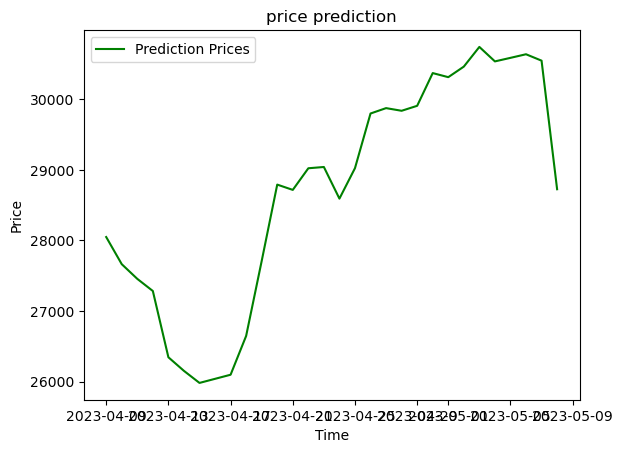

In [11]:
import matplotlib.pyplot as plt
plt.plot(forecast, color='green', label='Prediction Prices')
plt.title('price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc ='upper left')
plt.show()